In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [2]:
cifar10_train = torchvision.datasets.CIFAR10('datasets/cifar_10', download=True)
cifar10_test = torchvision.datasets.CIFAR10('datasets/cifar_10', train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(len(cifar10_train))
print(len(cifar10_test))

50000
10000


In [4]:
# each element is a tuple of (image, label)
cifar10_train[1259]

(<PIL.Image.Image image mode=RGB size=32x32>, 6)

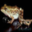

In [5]:
# an image
cifar10_train[1259][0]

In [11]:
cifar10_train[1259][0].shape

torch.Size([3, 32, 32])

Below code is referenced from torch tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [7]:
cifar10_train = torchvision.datasets.CIFAR10('datasets/cifar_10', download=True, transform=transform)
cifar10_test = torchvision.datasets.CIFAR10('datasets/cifar_10', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 8
train_loader = torch.utils.data.DataLoader(cifar10_train, batch_size=batch_size, shuffle=True, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [9]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

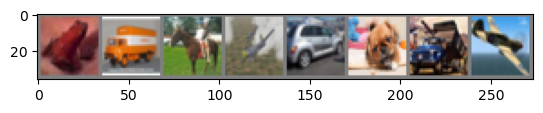

frog  truck horse plane car   dog   truck plane


In [10]:
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))